# Assignment: Trees
Do three questions.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

Trees are constructed by nodes that represent characteristics/decisions from the prior data point classifying a data point as a certain identity.

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

Trees allow for specified difference meaning inferences are not as rigid, because they are naturally more complex. Linear models do not account for this complexity, and often require transformations.

3. Why is the Gini a good loss function for categorical target variables?

Gini makes a good loss function because it handles the probability of misclassification of random labeling based on nodes.

4. Why do trees tend to overfit, and how can this tendency be constrained?

Trees account for many differences in charateristics, somethings they can be too detailed meaning they don't account for variance and outliers.

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

False, they can handle both categorical and numeric variables, they work well for complex situations.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

It allows for easier computation, flexibility, and avoidance of overfitting the data.

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

Comparing the depth of the tree compared to the size of the dataset, and performing training data versus test data.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status'],
      dtype='object')

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

There are 5 x 34 observations (170). There are 34 variables.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?
70.11% accuracy

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

It performs better with respect to specificity.

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?
The $R^2$ is 0.1567, at the value of 110. The model does not seem to be very accurate. I would not be comfortable using it in a clinical setting where peoples lives could be at risk.

In [8]:
#3a
df3 = pd.read_csv('/content/Breast Cancer METABRIC.csv')
df3.shape
df3.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [9]:
#3b
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

stagedum = pd.get_dummies(df3['Tumor Stage'])
chemodum = pd.get_dummies(df3['Chemotherapy'])
typedum = pd.get_dummies(df3['Cancer Type Detailed'])


y = df3['Overall Survival Status']
vars = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']


X = pd.concat([stagedum, chemodum, typedum, df3[vars]], axis=1)
X.columns = X.columns.astype(str)


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=104)

print(X.head())

     0.0    1.0    2.0    3.0    4.0     No    Yes  Breast  \
0  False  False   True  False  False   True  False   False   
1  False   True  False  False  False   True  False   False   
2  False  False   True  False  False  False   True   False   
3  False  False   True  False  False  False   True   False   
4  False  False   True  False  False  False   True   False   

   Breast Angiosarcoma  Breast Invasive Ductal Carcinoma  \
0                False                              True   
1                False                              True   
2                False                              True   
3                False                             False   
4                False                             False   

   Breast Invasive Lobular Carcinoma  \
0                              False   
1                              False   
2                              False   
3                              False   
4                              False   

   Breast Invasive Mixed 

In [15]:
#3c

df3 = df3.dropna()


stagedum = pd.get_dummies(df3['Tumor Stage'])
chemodum = pd.get_dummies(df3['Chemotherapy'])
typedum = pd.get_dummies(df3['Cancer Type Detailed'])

y = df3['Overall Survival Status']
vars = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']

X = pd.concat([stagedum, chemodum, typedum, df3[vars]], axis=1)
X.columns = X.columns.astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=104)


from sklearn import tree
cart = tree.DecisionTreeClassifier(min_samples_leaf=10)
cart = cart.fit(X_train, y_train)

y_hat = cart.predict(X_test)

tab = pd.crosstab(y_test,y_hat)
acc = (tab.iloc[0,0]+tab.iloc[1,1])/len(y_test)
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test, y_hat)


Accuracy:  0.6073059360730594 



col_0,Deceased,Living
Overall Survival Status,,
Deceased,79,39
Living,47,54


In [16]:
#3d
TN, FP, FN, TP = tab.values.ravel()

TPR = TP / (TP + FN)  # Sensitivity
TNR = TN / (TN + FP)  # Specificity

print("True Positive Rate (Sensitivity):", round(TPR, 4))
print("True Negative Rate (Specificity):", round(TNR, 4))



True Positive Rate (Sensitivity): 0.5347
True Negative Rate (Specificity): 0.6695


Optimal min_samples_leaf: 110
R² for optimal min_samples_leaf: 0.1567


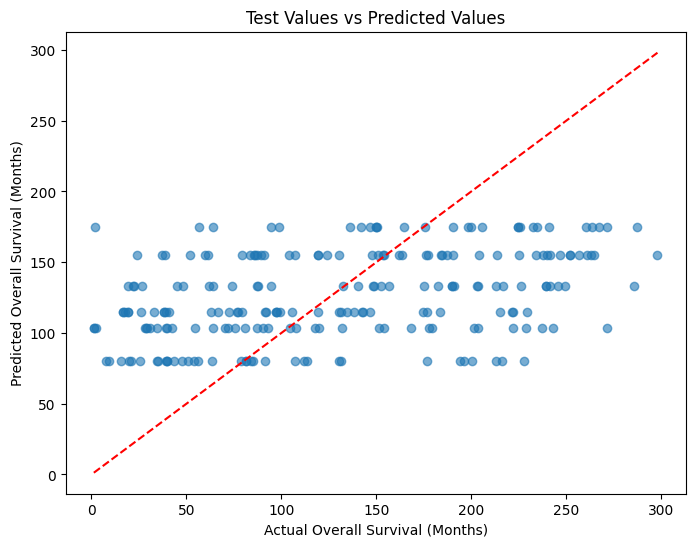

In [21]:
#3e
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np


stagedum = pd.get_dummies(df3['Tumor Stage'])
chemodum = pd.get_dummies(df3['Chemotherapy'])
typedum = pd.get_dummies(df3['Cancer Type Detailed'])


y = df3['Overall Survival (Months)']
vars = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']


X = pd.concat([stagedum, chemodum, typedum, df3[vars]], axis=1)
X.columns = X.columns.astype(str)


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=104)


minleafs = [5, 10, 20, 30, 50, 100, 110, 120]

r2_scores = []

for min_samples_leaf in minleafs:


    regressor = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf, random_state=104)
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)


    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)


optimal_min_samples_leaf = minleafs[np.argmax(r2_scores)]
optimal_r2 = max(r2_scores)

print(f"Optimal min_samples_leaf: {optimal_min_samples_leaf}")
print(f"R² for optimal min_samples_leaf: {optimal_r2:.4f}")


regressor = DecisionTreeRegressor(min_samples_leaf=optimal_min_samples_leaf, random_state=104)
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Test Values vs Predicted Values')
plt.xlabel('Actual Overall Survival (Months)')
plt.ylabel('Predicted Overall Survival (Months)')
plt.show()

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

There are 2029x31 observations(62899), and there are 31 variables.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and
C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

Not very well! Only about 15%

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

The accuracy increases dramatically to 0.435, meaning the name of the agency had a large impact on the rating of the agency.

In [28]:
#4a

df4 = pd.read_csv('/content/corporate_ratings.csv')

df4.shape

df4.head()


,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


(array([398., 671.,  89., 490., 302.,  64.,   1.,   5.,   7.,   2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

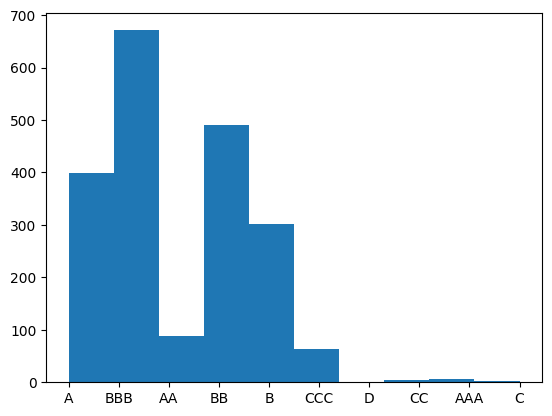

In [30]:
#4b
plt.hist(df4['Rating'])

df4[]

In [33]:
#4b
def group_rating(Rating):
    if Rating in ['AAA', 'AA', 'A']:
        return 'A'
    elif Rating in ['BBB', 'BB', 'B']:
        return 'B'
    elif Rating in ['CCC', 'CC', 'C']:
        return 'C'
    elif Rating == 'D':
        return 'Default'
    else:
        return 'Other'

df4['Bond Rating Grouped'] = df4['Rating'].apply(group_rating)

In [42]:
#4c
sectordum = pd.get_dummies(df4['Sector'])

y = df4['Rating']
vars = ['currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding',
       'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin',
       'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed',
       'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover',
       'debtEquityRatio', 'debtRatio', 'effectiveTaxRate',
       'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare',
       'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue',
       'enterpriseValueMultiple', 'operatingCashFlowPerShare',
       'operatingCashFlowSalesRatio', 'payablesTurnover',
       'Bond Rating Grouped']

X = pd.concat([sectordum, df4[vars]], axis=1)
X.columns = X.columns.astype(str)

print(X.head())

   Basic Industries  Capital Goods  Consumer Durables  Consumer Non-Durables  \
0             False          False               True                  False   
1             False          False               True                  False   
2             False          False               True                  False   
3             False          False               True                  False   
4             False          False               True                  False   

   Consumer Services  Energy  Finance  Health Care  Miscellaneous  \
0              False   False    False        False          False   
1              False   False    False        False          False   
2              False   False    False        False          False   
3              False   False    False        False          False   
4              False   False    False        False          False   

   Public Utilities  ...  freeCashFlowOperatingCashFlowRatio  \
0             False  ...                

[Text(0.4496642721574859, 0.96875, 'operatingCashFlowPerShare <= 3.015\ngini = 0.769\nsamples = 2029\nvalue = [398, 89, 7, 302, 490, 671, 2, 5, 64, 1]'),
 Text(0.19703389830508475, 0.90625, 'returnOnAssets <= 0.034\ngini = 0.752\nsamples = 682\nvalue = [52, 11, 0, 199, 221, 148, 2, 4, 45, 0]'),
 Text(0.3233490852312853, 0.9375, 'True  '),
 Text(0.12641242937853106, 0.84375, 'debtRatio <= 0.754\ngini = 0.686\nsamples = 380\nvalue = [1, 2, 0, 143, 146, 48, 1, 4, 35, 0]'),
 Text(0.07980225988700565, 0.78125, 'quickRatio <= 1.431\ngini = 0.661\nsamples = 229\nvalue = [1.0, 0.0, 0.0, 63.0, 109.0, 42.0, 0.0, 1.0, 13.0\n0.0]'),
 Text(0.052259887005649715, 0.71875, 'companyEquityMultiplier <= 1.912\ngini = 0.702\nsamples = 148\nvalue = [1, 0, 0, 38, 60, 37, 0, 1, 11, 0]'),
 Text(0.046610169491525424, 0.65625, 'gini = 0.581\nsamples = 17\nvalue = [0, 0, 0, 4, 1, 10, 0, 0, 2, 0]'),
 Text(0.05790960451977401, 0.65625, 'cashPerShare <= 2.561\ngini = 0.682\nsamples = 131\nvalue = [1, 0, 0, 34, 59, 

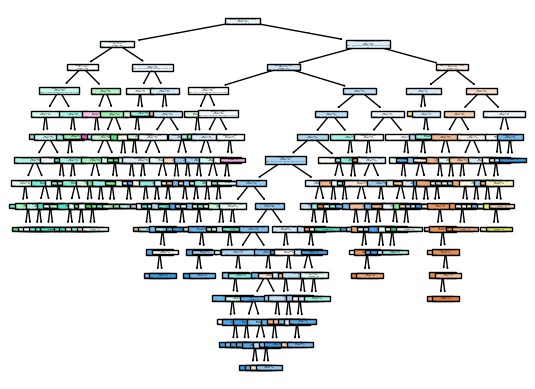

In [49]:
#4d
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=104)

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


cart = DecisionTreeClassifier(min_samples_leaf=10)
cart = cart.fit(X, y)

var_names = cart.feature_names_in_
plot_tree(cart,filled=True,feature_names=var_names)

In [50]:
y_hat = cart.predict(X_test)

tab = pd.crosstab(y_test,y_hat)
acc = (tab.iloc[0,0]+tab.iloc[1,1])/len(y_test)
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test, y_hat)

Accuracy:  0.15517241379310345 



col_0,A,AA,AAA,B,BB,BBB,CCC
Rating,,,,,,,
A,58,0,1,0,6,13,0
AA,5,5,0,1,2,2,0
AAA,1,0,2,0,0,0,0
B,1,1,0,37,6,9,0
BB,6,3,0,4,67,12,1
BBB,13,1,0,12,17,103,0
CC,0,0,0,0,1,0,1
CCC,2,0,0,4,4,0,5


In [67]:
#5e
namedum = pd.get_dummies(df4['Rating Agency Name'])


y = df4['Rating']
vars = ['currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding',
       'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin',
       'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed',
       'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover',
       'debtEquityRatio', 'debtRatio', 'effectiveTaxRate',
       'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare',
       'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue',
       'enterpriseValueMultiple', 'operatingCashFlowPerShare',
       'operatingCashFlowSalesRatio', 'payablesTurnover']

X = pd.concat([sectordum, namedum, df4[vars]], axis=1)
X.columns = X.columns.astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=104)


cart = DecisionTreeClassifier(min_samples_leaf=10)
cart = cart.fit(X_train, y_train)

y_hat = cart.predict(X_test)


accuracy = accuracy_score(y_test, y_hat)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.4335


**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?